# 目录
#### 1.提出问题
#### 2.理解数据
#### 3.清理数据
#### 4.建模分析
#### 5.提出建议

## 1. 提出问题

每天淘宝都有大量的用户访问量，但最终完成交易的用户只是其中极少数；

为改善整个购物流程中的流失率，将通过研究用户行为回答以下几个细分问题：


1. 付费流程各个环节的流失率
2. 不同用户的行为特征
3. 转化环节流失原因
4. 提出改善建议

分析思路：

1. 参考AARRR模型，将用户行为分为多个流程环节,查看用户在各个环节的流失率

2. 按转化率划分用户，从多角度考察不同用户的行为特征，协助下一步研究流失原因

3. 采用假设检验，对比分析等方法结合之前两步研究结果探索流失原因

4. 综合上述研究结论提出建议

## 2. 理解数据

### 2.1 数据来源

数据来自阿里天池：https://tianchi.aliyun.com/dataset/dataDetail?dataId=649&userId=1

选取了淘宝2017-11-25至2017-12-3之间的用户行为数据，约有一亿多条数据

### 2.2 理解数据

**User_ID**：用户id

**Item_ID**：商品id

**Category_ID**: 商品类目id

**Behavior_type**：用户行为
* pv浏览商品详情页
* buy表示商品购买
* cart表示加入购物车
* fav表示收藏

**Timestamp**：用户行为发生时间戳

## 3.清理数据

### 3.1 导入数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pylab import mpl
from pyecharts import options as opts
from pyecharts.charts import Funnel
from pyecharts.charts import Line
from pyecharts.charts import Grid
from pyecharts.charts import Bar
from pyecharts.charts import Pie
mpl.rcParams['font.sans-serif']=['SimHei']

pd.options.display.max_rows=10
pd.set_option('float_format', lambda x: '%.3f' % x)

In [ ]:
data_orignal=pd.read_csv('D:/CHROME下载/UserBehavior.csv/UserBehavior.csv',header=None)
data_orignal.columns=['User_ID','Item_ID','Category_ID','Behavior_type','Timestamp']

由于数据集过大，挑选约500万条数据

In [9]:
k=int(len(data_orignal)/20)
data_partial=data_orignal.sample(k)
data_partial.to_csv('D:/CHROME下载/data_partial.csv',index=False)

### 3.2 处理缺失值

In [68]:
data_partial=pd.read_csv('D:/CHROME下载/用户行为/data_partial.csv')

In [7]:
data_partial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5007540 entries, 0 to 5007539
Data columns (total 5 columns):
User_ID          int64
Item_ID          int64
Category_ID      int64
Behavior_type    object
Timestamp        int64
dtypes: int64(4), object(1)
memory usage: 191.0+ MB


可见没有缺失值

### 3.3处理异常值

初步整理数据
1. 删除重复值
2. 将时间列从整数转为时间类型

In [69]:
data_partial=data_partial.drop_duplicates(subset=['User_ID','Item_ID','Timestamp'])
data_partial['Times']=pd.to_datetime(data_partial.Timestamp,unit='s',utc=False)

整理时间序列
1. 将范围外的时间数据去除
2. 将时间列拆为日期，时间，一周中的日期

In [70]:
data_partial=data_partial[data_partial.Times.between(datetime(2017,11,25),datetime(2017,12,3))]
data_partial['date']=data_partial.Times.dt.date
data_partial['time']=data_partial.Times.dt.time
data_partial['day_of_week']=data_partial.Times.dt.dayofweek

In [71]:
data_partial.describe()

,User_ID,Item_ID,Category_ID,Timestamp,day_of_week
count,4348464.000,4348464.000,4348464.000,4348464.000,4348464.000
mean,507119.149,2579722.915,2696303.607,1511921508.924,3.364
std,294109.168,1487876.511,1462801.304,205142.600,1.955
min,2.000,4.000,80.000,1511568000.000,0.000
25%,252711.000,1294819.000,1320293.000,1511747232.000,2.000
50%,504073.000,2581359.000,2671397.000,1511932559.000,4.000
75%,761369.000,3860896.000,4145813.000,1512110842.250,5.000
max,1018011.000,5163064.000,5161669.000,1512259200.000,6.000


## 4. 建模分析

### 4.1 各个环节的用户流失率

比照AARRR模型，将用户按照其行为分为几个环节：
1. pv
2. cart
3. fav
4. buy

In [212]:
temp=data_partial.Behavior_type.value_counts()
c = (
    Funnel()
    .add(
        "行为",
        [list(z) for z in zip(temp.index.tolist(),temp.tolist())],
        label_opts=opts.LabelOpts(position="inside"),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="用户行为漏斗"))   
    
)
c.render_embed()

'<!DOCTYPE html>\n<html>\n<head>\n    <meta charset="UTF-8">\n    <title>Awesome-pyecharts</title>\n            <script type="text/javascript" src="https://assets.pyecharts.org/assets/echarts.min.js"></script>\n\n</head>\n<body>\n    <div id="56bb9ae59f1843c49be4cf6e5de72647" class="chart-container" style="width:900px; height:500px;"></div>\n    <script>\n        var chart_56bb9ae59f1843c49be4cf6e5de72647 = echarts.init(\n            document.getElementById(\'56bb9ae59f1843c49be4cf6e5de72647\'), \'white\', {renderer: \'canvas\'});\n        var option_56bb9ae59f1843c49be4cf6e5de72647 = {\n    "animation": true,\n    "animationThreshold": 2000,\n    "animationDuration": 1000,\n    "animationEasing": "cubicOut",\n    "animationDelay": 0,\n    "animationDurationUpdate": 300,\n    "animationEasingUpdate": "cubicOut",\n    "animationDelayUpdate": 0,\n    "color": [\n        "#c23531",\n        "#2f4554",\n        "#61a0a8",\n        "#d48265",\n        "#749f83",\n        "#ca8622",\n       

可以看到最大的流失环节出现在第一步到第二步转化中

### 4.2 不同用户的行为特征

**为研究用户流失原因，在这一步我们要研究：**

**不同转化率的用户，其行为特征有何不同** 

首先根据转化率分布定义界定高转化率
*(转化率：用户购买数/用户浏览数)*

In [73]:
def count_ratio(x):
    return list(x).count('buy')/x.count()
ctr=data_partial.groupby('User_ID')['Behavior_type'].apply(count_ratio)
ctr_without0=ctr[ctr.values>0]

查看用户转化率的分布：

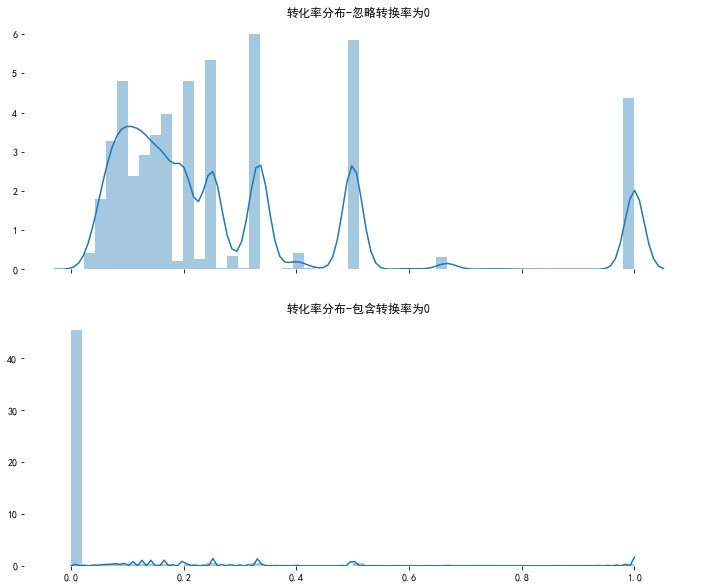

In [203]:
fig,ax=plt.subplots(2,1,sharex=True)
fig.set_size_inches(12,10)
sns.distplot(ctr_without0,ax=ax[0])
sns.distplot(ctr,ax=ax[1])
sns.despine(top=True)

ax[0].set(title='转化率分布-忽略转换率为0',xlabel='')
ax[1].set(title='转化率分布-包含转换率为0',xlabel='')

sns.set_palette('Paired')
sns.despine(left=True,bottom=True)

**发现**：
1. 大部分用户的转化率为0
2. 除0以外大部分用户转化率在40%以下

**所以定义**：

高转化率用户转化率为20%以上

In [74]:
#将转化率添加至表格
high_ctr=ctr[ctr>0.2]
data_highctr=data_partial.merge(high_ctr,how='inner',left_on='User_ID',right_index=True)
data_highctr=data_highctr.rename(columns={'Behavior_type_x':'Behavior_type','Behavior_type_y':'ctr'})
data_ctr=data_partial.merge(ctr,how='left',left_on='User_ID',right_index=True)
data_ctr=data_ctr.rename(columns={'Behavior_type_x':'Behavior_type','Behavior_type_y':'ctr'})

现从以下4个角度分析高转化率用户的行为特征：
1. 浏览商品种类数量
2. 从浏览到下单花费的时间
3. 下单时间所在时间段
4. 浏览时间时间段

#### 4.2.1 浏览商品种类数量

**发现**
    有部分用户没有经历pv就已经购买，这不符合实际操作规律

**认为**
    pv,cart,fav行为在该记录时段之前发生
    
**因此**
    剔除这部分用户

In [75]:
def count_pv(x):
    return list(x.Behavior_type).count('pv')
user_pv_count_highctr=data_highctr.groupby(['User_ID','Item_ID']).apply(count_pv)
user_pv_count_highctr_no0=user_pv_count_highctr[user_pv_count_highctr>0]
user_pv_count_highctr_no0=user_pv_count_highctr_no0.reset_index([0,1]).groupby(['User_ID','Item_ID']).sum().rename(columns={0:'pv_count'})

data_highctr_pv_no0=data_highctr.merge(user_pv_count_highctr_no0,how='inner',left_on=['User_ID','Item_ID'],right_on=['User_ID','Item_ID'])

查看不同转化率下，用户pv的平均数量

In [208]:
def avg_pv(x):
    return list(x.Behavior_type).count('pv')/len(x.User_ID.unique())
temp=data_highctr_pv_no0.groupby('ctr').apply(avg_pv)
c = (
    Line()
    .add_xaxis(temp.index)
    .add_yaxis("", temp.values,color='#0EADB5', is_smooth=True)
    .set_series_opts(
        areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="高转化率用户平均pv",subtitle='--除去无pv用户'),
        xaxis_opts=opts.AxisOpts(is_scale=True)

    )
)
c.render_notebook()

**发现：**
1. 对于高转化率用户，整体上转化率越高，pv越少
2. 转化率在一定范围内，pv数量来回震荡

进一步查看全体数据(去除无pv用户)

In [76]:
user_pv_count_ctr=data_ctr.groupby(['User_ID','Item_ID']).apply(count_pv)
user_pv_count_ctr_no0=user_pv_count_ctr[user_pv_count_ctr>0]
user_pv_count_ctr_no0=user_pv_count_ctr_no0.reset_index([0,1]).groupby(['User_ID','Item_ID']).sum().rename(columns={0:'pv_count'})

data_ctr_pv_no0=data_ctr.merge(user_pv_count_ctr_no0,how='inner',left_on=['User_ID','Item_ID'],right_on=['User_ID','Item_ID'])

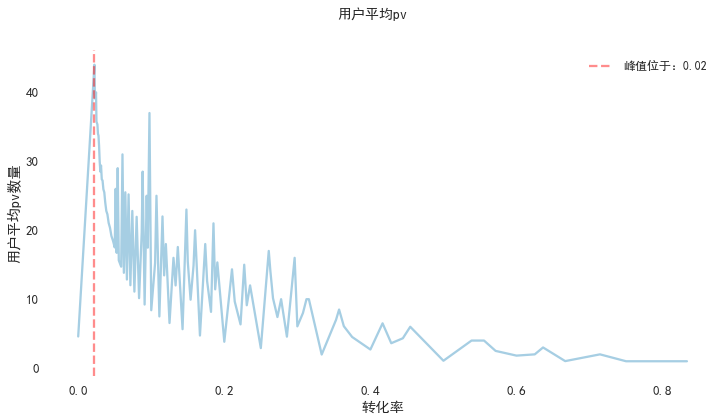

In [80]:
plt.figure(figsize=(12,6))
sns.lineplot(data=data_ctr_pv_no0.groupby('ctr').apply(avg_pv))
sns.despine(left=True,bottom=True)

plt.xlabel('转化率')
plt.ylabel('用户平均pv数量')
plt.suptitle('用户平均pv',fontsize=14)
plt.axvline(x=data_ctr_pv_no0.groupby('ctr').apply(avg_pv).nlargest(1).index,
            label='峰值位于：'+str(round(data_ctr_pv_no0.groupby('ctr').apply(avg_pv).nlargest(1).index[0],2)),
            c='r',
            ls='--',
            alpha=0.45)
plt.legend(fontsize=12)


**发现：**
1. 转化率从0%-2.23%时，pv迅速上升
2. 转化率从2.23%-35%时,pv震荡下降
3. 转化率35%以上时,pv缓慢下降

#### 4.2.2 从浏览到下单花费的时间

计算完整购买流程时间：

In [78]:
data_ctr_pvno0_buy=data_ctr_pv_no0.merge(data_ctr_pv_no0[data_ctr_pv_no0.Behavior_type=='buy'][['User_ID','Item_ID']].drop_duplicates(),
                                        how='inner')

In [80]:
def buytime(x):
    times_min=x[x.Behavior_type=='pv']['Times'].min()
    times_max=x[x.Behavior_type=='buy']['Times'].max()
    k=times_max-times_min
    return k.total_seconds()/3600
temp=data_ctr_pvno0_buy.groupby(['User_ID','Item_ID']).apply(buytime)
temp=temp[temp>0]
temp=temp.rename('buytime').reset_index([0,1])
temp2=temp.merge(data_ctr_pvno0_buy[['User_ID','Item_ID','ctr']])
temp2=temp2.drop_duplicates()

将人群分类进行比较：

In [81]:
temp4=pd.cut(data_ctr_pvno0_buy.ctr,bins=[0,0.2,0.4,1],labels=['low_ctr','mid_ctr','high_ctr']).rename('label')
temp5=pd.concat([temp4,data_ctr_pvno0_buy.User_ID],axis=1)
temp6=temp5.merge(temp)[['label','buytime']]

Text(0, 0.5, '平均用时')

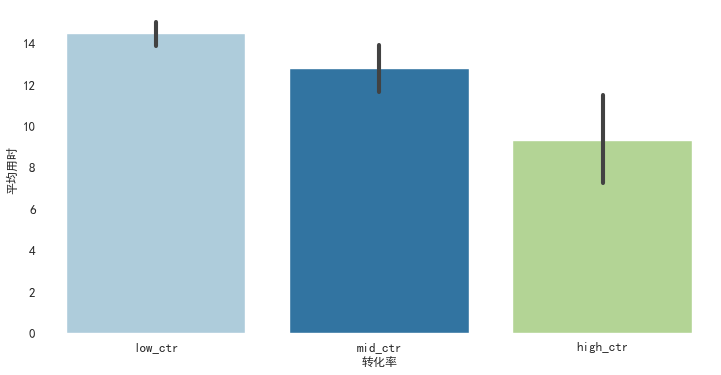

In [84]:
plt.figure(figsize=(12,6))
sns.barplot(x='label',y='buytime',data=temp6,estimator=np.mean)
sns.set_palette("Paired")
sns.despine(left=True,bottom=True)
plt.xlabel('转化率',fontsize=12)
plt.ylabel('平均用时',fontsize=12)

**发现：**总体上转化率高的用户，购物流程用时越短

#### 4.2.3下单时间所在时间段

给下单时间分为 **凌晨、上午、中午、下午、夜晚、深夜**

In [87]:
data_ctr_pvno0_buy['hour']=data_ctr_pvno0_buy.Times.dt.hour
buy_hour_labeled=pd.cut(data_ctr_pvno0_buy[data_ctr_pvno0_buy.Behavior_type=='buy'].hour,
                        bins=[0,3,6,11,13,18,22,24],labels=['深夜1','凌晨','上午','中午','下午','夜晚','深夜2'],include_lowest=True)
buy_hour_labeled=pd.Series(buy_hour_labeled.to_list(),name='hour_label')
buy_hour_labeled[buy_hour_labeled=='深夜1']='深夜'
buy_hour_labeled[buy_hour_labeled=='深夜2']='深夜'

下单时间分布：

In [95]:
temp_data=buy_hour_labeled.value_counts()
c = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(temp_data.index.tolist(), temp_data.values.tolist())],
        center=["35%", "50%"],
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各时段的下单发布"),
        legend_opts=opts.LegendOpts(pos_left="20%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
)
c.render_notebook()

查看不同转化率下，各时间段的下单数:

In [99]:
ctr_label_temp=pd.cut(data_ctr_pvno0_buy[data_ctr_pvno0_buy.Behavior_type=='buy'].ctr,
                bins=[0,0.2,0.4,1],labels=['low_ctr','mid_ctr','high_ctr'],include_lowest=True)
ctr_label_temp=ctr_label_temp.rename('ctr_label')
ctr_temp=data_ctr_pvno0_buy[data_ctr_pvno0_buy.Behavior_type=='buy'].ctr
hour_temp=data_ctr_pvno0_buy[data_ctr_pvno0_buy.Behavior_type=='buy'].hour
hour_label_temp=pd.cut(data_ctr_pvno0_buy[data_ctr_pvno0_buy.Behavior_type=='buy'].hour,
                        bins=[0,3,6,11,13,18,22,24],labels=['深夜1','凌晨','上午','中午','下午','夜晚','深夜2'],include_lowest=True).rename('hour_label')
ctr_hour_buy=pd.concat([ctr_label_temp,ctr_temp,hour_temp],axis=1)
hour_label_temp=pd.Series(hour_label_temp.to_list(),index=hour_label_temp.index,name='hour_label')
hour_label_temp[hour_label_temp=='深夜1']='深夜'
hour_label_temp[hour_label_temp=='深夜2']='深夜'
ctr_hour_buy=pd.concat([hour_label_temp,ctr_hour_buy],axis=1)

In [119]:
temp_data=ctr_hour_buy[['hour_label','ctr_label','ctr']].groupby(['hour_label','ctr_label']).count().reset_index()
temp_high=temp_data[temp_data.ctr_label=='high_ctr']
temp_mid=temp_data[temp_data.ctr_label=='mid_ctr']
temp_low=temp_data[temp_data.ctr_label=='low_ctr']
c=(
Bar()
.add_xaxis(temp_data.hour_label.unique().tolist())
.add_yaxis('低转化率',temp_low.ctr.tolist(),gap=0)
.add_yaxis('中转化率',temp_mid.ctr.tolist(),gap=0)
.add_yaxis('高转化率',temp_high.ctr.tolist(),gap=0)
.set_global_opts(title_opts=opts.TitleOpts(title="不同转化率下的各时段单量分布"))
)
c.render_notebook()

**发现：** 
1. 不同转化率下，各时段下单数趋势近似;转化率与时间段关系不大
2. 上午、深夜、凌晨的下单数额较多

查看一周内不同日期的下单数量：

In [120]:
test=pd.cut(data_ctr_pvno0_buy[data_ctr_pvno0_buy.Behavior_type=='buy'].day_of_week,
       bins=[0,4,6],labels=['工作日','周末'],
       include_lowest=True,
       right=True).rename('label')
buy_count_day=pd.concat([data_ctr_pvno0_buy[data_ctr_pvno0_buy.Behavior_type=='buy'].day_of_week,
                        test],axis=1)

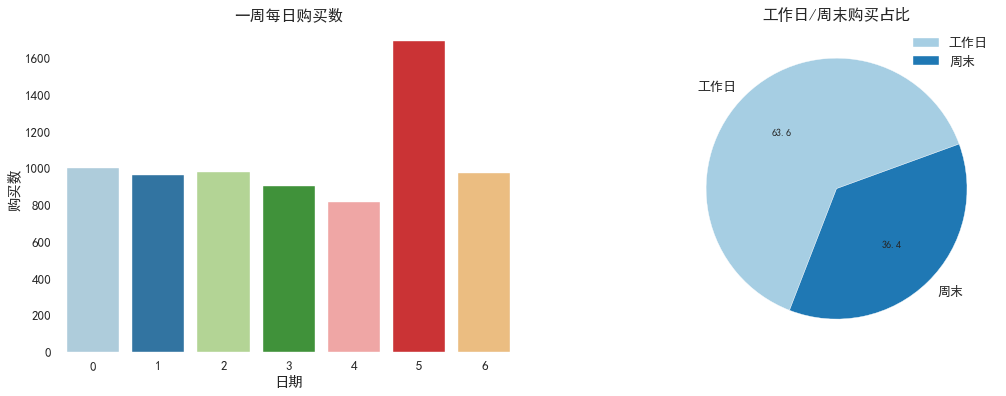

In [90]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(18,6)

ax[1].pie(x=buy_count_day.label.value_counts(),labels=buy_count_day.label.value_counts().index,startangle=20,autopct='%1.1f')
sns.countplot(x='day_of_week',data=buy_count_day,ax=ax[0])
props={'title':'一周每日购买数','xlabel':'日期','ylabel':'购买数'}
ax[0].set(**props)
ax[1].set_title('工作日/周末购买占比')
ax[1].legend()
sns.set_palette('Paired')
sns.despine(left=True,bottom=True)

**发现：** 
1. 购买峰值出现在周六
2. 其余日期购买数相近
3. 工作日购买数量远大于周末

#### 4.2.4浏览时间所在时间段


In [189]:
data_ctr_pv_no0['Times']=pd.to_datetime(data_ctr_pv_no0.Times)
data_ctr_pv_no0['hour']=data_ctr_pv_no0.Times.dt.hour
pv_hour_labeled=pd.cut(data_ctr_pv_no0.hour,
                        bins=[0,3,6,11,13,18,22,24],labels=['深夜1','凌晨','上午','中午','下午','夜晚','深夜2'],include_lowest=True)
pv_hour_labeled=pd.Series(pv_hour_labeled.to_list(),index=data_ctr_pv_no0.index,name='hour_label')
pv_hour_labeled[pv_hour_labeled=='深夜1']='深夜'
pv_hour_labeled[pv_hour_labeled=='深夜2']='深夜'

ctr_label_temp_pv=pd.cut(data_ctr_pv_no0.ctr,
                bins=[0,0.2,0.4,1],labels=['low_ctr','mid_ctr','high_ctr'],include_lowest=True).rename('ctr_label')
pv_hour_ctr_labeled=pd.concat([ctr_label_temp_pv,pv_hour_labeled],axis=1)

In [190]:
test1=pd.cut(data_ctr_pv_no0.day_of_week,
       bins=[0,4,6],labels=['工作日','周末'],
       include_lowest=True,
       right=True).rename('label')
pv_count_day=pd.concat([data_ctr_pv_no0.day_of_week,
                        test1],axis=1)

对比查看浏览与购买随时间变化：

In [192]:
pv_hour=data_ctr_pv_no0[data_ctr_pv_no0.Behavior_type=='pv'][['hour','ctr']]
buy_hour=data_ctr_pvno0_buy[data_ctr_pvno0_buy.Behavior_type=='buy'][['hour','ctr']]

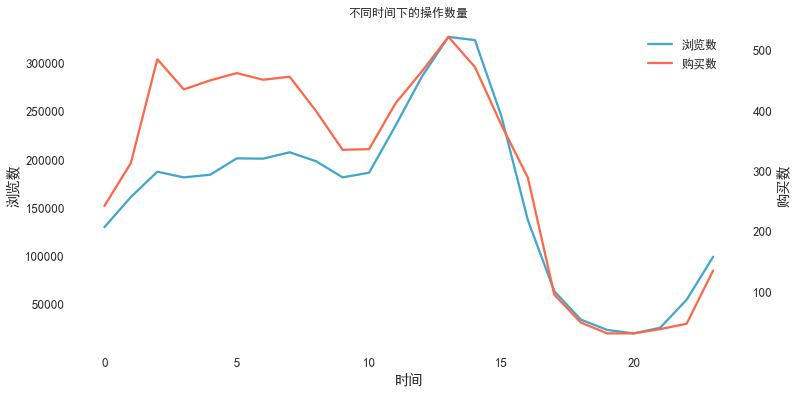

In [101]:
fig,ax1=plt.subplots()
fig.set_size_inches(12,6)
ax2=ax1.twinx()

sns.lineplot(data=pv_hour.groupby('hour').count(),legend=False,
             ax=ax1,palette='GnBu_d',label='浏览数')
sns.lineplot(data=buy_hour.groupby('hour').count(),legend=False,
             ax=ax2,palette='Reds',label='购买数')


ax1.legend(loc=(0.85,0.9),fontsize=12)
ax2.legend(loc=(0.85,0.84),fontsize=12)
ax1.set(xlabel='时间',ylabel='浏览数')
ax2.set(ylabel='购买数')
ax1.set_title(label='不同时间下的操作数量',fontsize=12)
sns.despine(left=True,bottom=True)

**发现：**
1. 购买与浏览总体趋势相似
2. 相对于浏览，发生在0a.m - 10.a.m的购买行为占比较多，也就是说流失现象相对集中在10a.m之后

**总结：** 
1. 高转化率用户购买流程时间较短
2. 时间上流失现象较为集中于10a.m之后
3. 日期上流失现象较为集中于周末
4. 无论转化率如何，购买，浏览都集中在上午、深夜、凌晨
5. 总体上，在转化率超过阈值后转化率越高，浏览次数越少转化率；超越阈值之前，随着转化率增高，浏览次数迅速增高

###  4.3用户流失原因分析

流失原因使用假设-检验的方式

以下是根据以上数据探索得出的假设，假设以客户购买目标是否明确为区分：

**客户有明确购买目标:**
1. 搜索结果不够准确，无法通过搜索快速找到目标物品导致转化失败
2. 产品分类不理想/软件逻辑混乱，无法快速接触目标物品，长时间找不到目标物品导致转化失败

**客户无明确购买目标：**   
3. 推送物品不够精准，无法促使目标客户转化
4. 推送时间不够准确

受到数据以及获得信息限制，只可对以下做出直接检验：
1. 搜索结果不够准确，无法通过搜索快速找到目标物品导致转化失败
3. 推送物品不够精准，无法促使目标客户转化

对比购买量前十的物品类别以及浏览量前十的物品类别：

In [102]:
cat_buy=data_ctr_pv_no0[data_ctr_pv_no0.Behavior_type=='buy'].groupby('Category_ID')['User_ID'].count().rename(columns={'User_ID':'buy_num'})
cat_pv=data_ctr_pv_no0[data_ctr_pv_no0.Behavior_type=='pv'].groupby('Category_ID')['User_ID'].count().rename(columns={'User_ID':'pv_num'})

In [201]:
cat_pv.nlargest(10)

Category_ID
4756105    194603
2355072    138066
4145813    136482
3607361    129935
982926     121739
2520377     87627
4801426     80694
1320293     78206
2465336     65860
3002561     62103
dtype: int64

In [202]:
cat_buy.nlargest(10)

Category_ID
4756105    222
4145813    180
982926     143
4801426    141
3607361    124
2735466    110
2355072    105
1320293     98
2640118     94
2885642     89
dtype: int64

**发现：**购买量最大的前十类商品与浏览量前十的商品几乎没有重合

用可视化查看更大尺度的重合情况

**发现：**随着尺度变大，购买和浏览的重合度进一步下降（红色为购买，绿色为浏览）

**证明：**无论是搜索结果或推送机制，其精准度确实不够

其余假设只可通过之前的数据探索进行侧面验证：

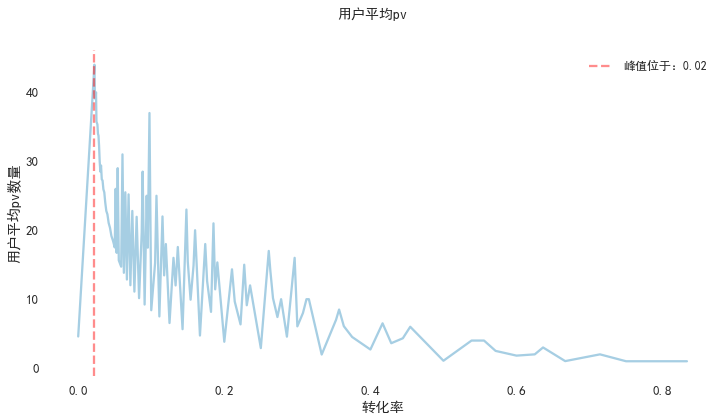

**观察上图发现：**转化率从高0到2.23%，浏览数迅速上升，说明对于有需求的用户为找到目标物品，会进行多次尝试；且需求越强烈/目的越明确，尝试次数越多



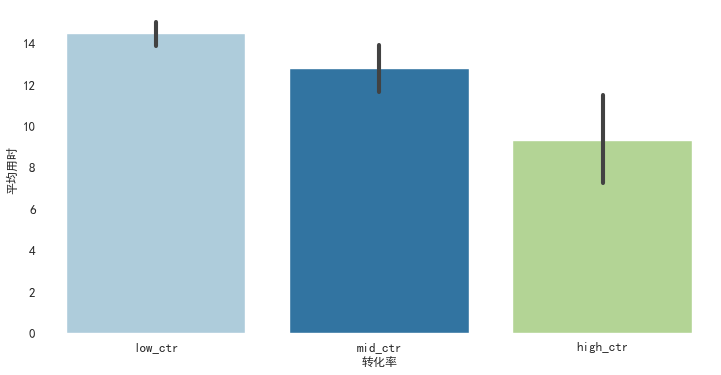

**结合上两图发现：** **高转化率用户，无论是时间和浏览数都变少，但时间减少的趋势较平缓**；这说明快速的接触到目标物品于转化率有关联

**那么有两种可能**：
1. 目标明确的用户本身转化率就高
2. 快速接触目标物品有助于转化

受到数据&信息限制无法，单独验证两种可能；

但能确定，两者不会单独存在，因为若单独存在，则图一应该是（总体上）单调递减的

## 5. 提出建议

技术侧：
1. 提高搜索识别准确度
2. 提高推荐系统精度

产品侧：
1. 和技术部合作，根据用户的购买记录，构建用户习惯；预先对同质化的商品/搜索结果进行筛选，缩短接触目标物品的时间
2. 根据用户习惯，在首页添加偏爱商品类别的快速通道

运营侧：
1. 根据用户活跃时间，选择在合适的时间推送活动提醒/商品推荐；即上午、下午、深夜，具体而言是[6,11]、[11,13]、[13,18]、[18,22]、[22,24]
2. 针对流失严重的时段/日期,提前进行流失干预；具体而言是10a.m之后、周末